In [1]:
from sympy import *
init_printing() # pretty print math symbols

# Math

## Symbolic constants

In [3]:
pi, E, I, oo

## Declaring Symbols and Variables

In [5]:
 x, a, b, c = symbols('x a b c')
y = a*x*x + b*x + c
y

## Symbolic Derivative

In [6]:
dydx = Derivative(y,x)
dydx

## Explicit Derivative

In [7]:
dydx.doit(), y.diff(x)

## Explicit Integration Version 1

In [11]:
integrate(y, x)

## Explicit Integration Version 2

In [13]:
y.integrate(x)

## Symbolic Integral

In [14]:
Integral(y, x)

## Integration with doit()

In [16]:
Integral(y, x).doit()

## Algebraic Solver

In [18]:
solve(y,x)

In [20]:
solve(x**3-1,x)

## Expansion

In [21]:
 expand(E**(4*pi*I/3), complex=True)

## Differential Equation Solver with diff()

In [22]:
f = Function('f')
k = symbols('k')
dsolve(diff(f(x),x)-k*f(x),f(x)) # diff(f(x),x)==f(x).diff(x)

## Differential Equation Solver with derivative()

In [24]:
dsolve(Derivative(f(x),x)-k*f(x),f(x))

## Solving 2nd order differential equation

In [55]:
dsolve(diff(f(x),x,x)+k*k*f(x),f(x))

## Calculating Definite Integral

In [58]:
integrate(sin(x)**2/x**2,(x,-oo,oo))

## Calculating Definite Integral with integrable singularity

In [61]:
 integrate(1/sqrt(x), (x,0,1))

## Calculating a Lorentzian

In [64]:
res = integrate(1/(x*x+a*a)**2,(x,-oo,oo))
simplify(res)

⎧       π                         π
⎪      ────        for │arg(a)│ < ─
⎪         3                       2
⎪      2⋅a                         
⎪                                  
⎪∞                                 
⎪⌠                                 
⎨⎮      1                          
⎪⎮  ────────── dx     otherwise    
⎪⎮           2                     
⎪⎮  ⎛ 2    2⎞                      
⎪⎮  ⎝a  + x ⎠                      
⎪⌡                                 
⎪-∞                                
⎩                                  

## Specify assumptions

In [68]:
a = symbols('a', positive=True) # specify conditions to help simplify
integrate(1/(x*x+a*a)**2,(x,-oo,oo))

## Blackbody radiation integral

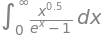

In [71]:
p=0.5
res = Integral(x**p/(exp(x)-1),(x,0,oo))
res

## Blackbody radiation integral numerical approximation

In [75]:
N(res), res.n(10)

## Gaussian integrals

In [78]:
n = symbols('n', integer=True, positive=True)
res = integrate(exp(-x*x) *x**n,(x,0,oo))
res

## Substitution

In [83]:
 res.subs(n,2), N(res.subs(n,2))

## Calculation of expansion coefficients

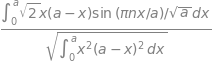

In [86]:
psi = lambda x: x*(a-x)
psin = lambda n, x: sqrt(2/a)*sin(n*pi*x/a)
a = symbols('a', positive=True)
A = Integral(psi(x)**2,(x,0,a)) # norm
cn = Integral(psi(x)*psin(n, x),(x,0,a))/sqrt(A)
cn

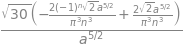

In [88]:
cn = cn.doit()
cn

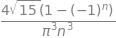

In [90]:
simplify(cn)

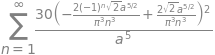

In [92]:
res = Sum(cn**2, (n,1,oo))
res

In [94]:
res.doit()

In [98]:
res.doit().n()

## Special functions  error erf(x), gamma (x), Airy $A_i$(x), and spherical Bessel $j_n$(x) functions

In [101]:
erf(x), gamma(x), airyai(x), jn(n,x)

## Plot $A_i$(x)

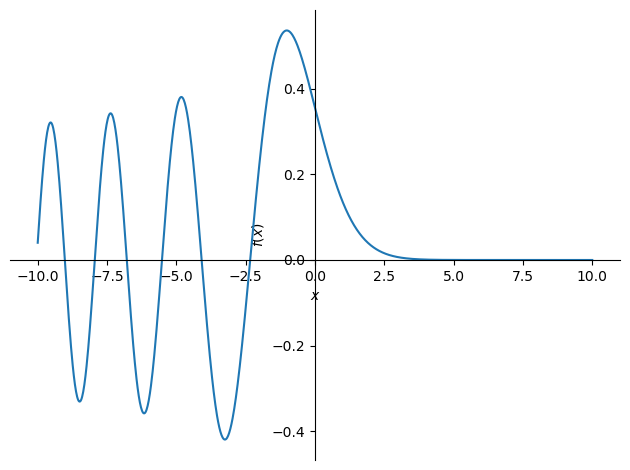

In [110]:
plot(airyai(x)) # may need to run twice

## erf(x)

In [114]:
integrate(exp(-x*x),(x,0,a)) # error func

## Dirac function δ(x − a)

In [116]:
integrate(f(x)*DiracDelta(x-a),(x,-oo,oo))

## Lambert W function

In [120]:
 W = symbols('W')
solve(W*exp(W)-x, W)

In [131]:
eqn = Derivative(x**3/(exp(x)-1),x)
res = solve(eqn.doit(),x) # freq, x = hν/kT
res ## Fails in my case

## Linear equations (variables with subscript)

In [137]:
x, y = symbols('x y')
a1, a2 = symbols('a1 a2')
b1, b2 = symbols('b1 b2')
c1, c2 = symbols('c1 c2')
eqns = [a1*x + a2*y-c1,
b1*x + b2*y-c2]
eqns

## Solving linear systems

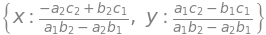

In [140]:
 res = solve(eqns, x, y)
res

## Matrix notation

In [143]:
A = Matrix([[a1,a2],[b1,b2]])
A

⎡a₁  a₂⎤
⎢      ⎥
⎣b₁  b₂⎦

## Solving linear systems under matrix notation

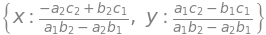

In [146]:
solve(A*Matrix([x, y])-Matrix([c1, c2]), Matrix([x, y]))

## Hermitian matrix

In [149]:
B = A.subs([[b1,a2], [b2,a1]]) # symmetric matrix
B

⎡a₁  a₂⎤
⎢      ⎥
⎣a₂  a₁⎦

## Eigenvalues and Eigenvectors

In [154]:
 B.eigenvects()

⎡⎛            ⎡⎡-1⎤⎤⎞  ⎛            ⎡⎡1⎤⎤⎞⎤
⎢⎜a₁ - a₂, 1, ⎢⎢  ⎥⎥⎟, ⎜a₁ + a₂, 1, ⎢⎢ ⎥⎥⎟⎥
⎣⎝            ⎣⎣1 ⎦⎦⎠  ⎝            ⎣⎣1⎦⎦⎠⎦

# Physics

# Quantum Simple Harmonic Oscillator

In [160]:
from sympy.physics.qho_1d import E_n, psi_n, hbar
n = symbols('n', integer=True, positive=True)
m, omega = symbols('m omega', positive=True)
x, a = symbols('x a')
E_n(n, omega), psi_n(0,x,m,omega)

In [162]:
 V = m*omega**2 * x**2/2
tp = solve(E_n(0, omega)-V, x) # turning points
tp

In [164]:
prob = Integral(psi_n(0,x,m,omega)**2, (x,tp[1],oo))
res = prob.doit()
res

In [166]:
2*N(res)

## Hydrogen Atom

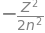

In [169]:
from sympy.physics.hydrogen import E_nl, R_nl
n, l = symbols('n l', integer=True, positive=True)
Z, r = symbols('Z r', positive=True)
E_nl(n,Z)

In [171]:
R_nl(2,0,r)

### Radial Probability Density

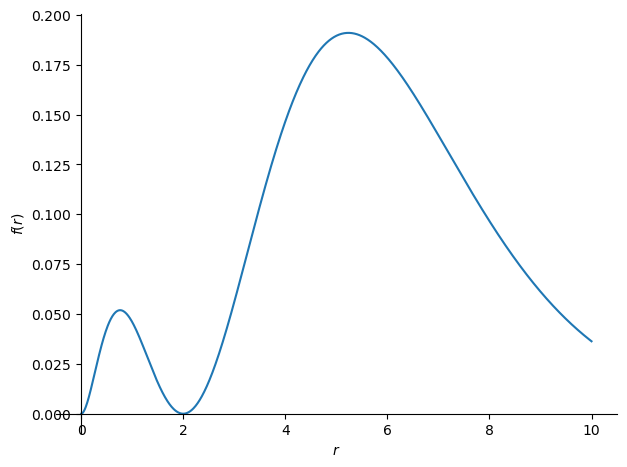

In [173]:
plot((r*R_nl(2,0,r))**2, (r,0,10))

### Radial Expectation Values

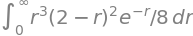

In [177]:
res = Integral(R_nl(2,0,r)**2*r**3,(r,0,oo)) # <r>
res

### Circular States

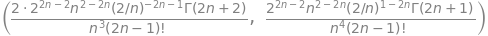

In [188]:
 int_res = integrate(R_nl(n,n-1,r)**2*r**3,(r,0,oo)), integrate(R_nl(n,n-1,r)**2*r,(r,0,oo))
int_res

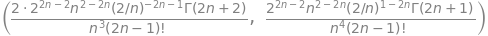

In [190]:
simplify(int_res) # Fails to simplify in my case. Moving on....